# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #7


*   Youtube Lecture #27-31
*   Written by Seungeun Lee

## 1. Recurrent Neural Network [RNN]
*     Reference. https://data-science.tistory.com/67

In [1]:
import torch
import torch.nn as nn

In [2]:
input_size = 5
hidden_size = 8

In [3]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [4]:
cell = nn.RNN(input_size, hidden_size, batch_first=True) # defines the RNN architecture
# batch_first = True -> indicates that the first dimension stands for the batch size
# if False, the input should be (10, 5), i.e. (time_steps, input_size), getting rid of the batch_size

In [5]:
outputs, _status = cell(inputs)

In [6]:
print(outputs.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps)

torch.Size([1, 10, 8])


In [7]:
print(_status.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step)

torch.Size([1, 1, 8])


In [8]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs2 = torch.Tensor(1, 10, 5)
cell2 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True) # num_layers = 2 -> deeper RNN (default: 1)
outputs2, _status2 = cell2(inputs2)
print(outputs2.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status2.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 2 layers

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [9]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs3 = torch.Tensor(1, 10, 5)
cell3 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 3, batch_first=True) # num_layers = 3 -> deeper RNN (default: 1)
outputs3, _status3 = cell3(inputs3)
print(outputs3.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status3.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 3 layers

torch.Size([1, 10, 8])
torch.Size([3, 1, 8])


## 2. Long Short Term Memory [LSTM]

In [10]:
# Deeper LSTM -- we only need to change nn.RNN into nn.LSTM
# (batch_size, time_steps, input_size)
inputs4 = torch.Tensor(1, 10, 5)# input4
cell4 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 4, batch_first=True) # num_layers = 4 -> deeper LSTM (default: 1)
outputs4, (h4, c4) = cell4(inputs4)
print(outputs4.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(h4.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers
print(c4.shape) # cell state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers

torch.Size([1, 10, 8])
torch.Size([4, 1, 8])
torch.Size([4, 1, 8])


### Question 1.
### Write a code for LSTM having 10 internal layers (num_layers = 10) and change the input size into (5, 50, 5). Please stick to the format provided. Check if the size of the output, hidden, and cell state are calculated properly.

In [12]:
inputs5 = torch.Tensor(5, 50, 5)
cell5 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 10, batch_first=True)
outputs5, (h5, c5) = cell5(inputs5)
print(outputs5.shape)
print(h5.shape)
print(c5.shape)

torch.Size([5, 50, 8])
torch.Size([10, 5, 8])
torch.Size([10, 5, 8])


### Question 2. Describe the limiations of (Vanilla) RNN and how LSTM overcomes these limitations.

기울기 소실 문제:

시간 역전파 (BPTT)를 사용하여 RNN을 훈련할 때, 기울기가 매우 작아져 사실상 사라지게 됩니다 ("기울기 소실"). 이로 인해 네트워크가 장기 의존성을 학습하기 어렵게 되며, 많은 시간 단계를 거치면서 기울기가 잘 전달되지 않습니다.

기울기 폭발 문제:

반대로, 기울기가 너무 커질 수도 있습니다 ("기울기 폭발"). 이는 모델의 훈련 과정에서 불안정성을 초래하고, 훈련을 관리하기 어렵게 만듭니다. 비록 기울기 소실 문제만큼 빈번하지는 않지만 여전히 문제가 될 수 있습니다.

단기 메모리:

Vanilla RNN은 본질적인 구조로 인해 단기 의존성을 포착하는 데 더 뛰어납니다. 과거의 정보가 더 많은 시간 단계를 거치면서 점차 소멸되기 때문에 장기 의존성에는 취약합니다.

긴 시퀀스 학습의 어려움:

기울기 소실 및 폭발 문제로 인해 RNN은 긴 기간에 걸친 시퀀스 패턴을 학습하는 데 어려움을 겪습니다.

## 3. Gated Recurrent Unit [GRU]

### Question 3.
### Write a code for GRU having 5 internal layers (num_layers = 5) and change the input size into (3, 45, 7). (Change the input_size adequately) Please stick to the format provided. Check if the size of output and hidden state are calculated properly.
### Hint: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html Its implementation is similar to that of RNN.

In [13]:
inputs6 = torch.Tensor(3, 45, 7)
cell6 = nn.GRU(input_size = 7, hidden_size = 8, num_layers = 5, batch_first=True)
outputs6, _status6 = cell6(inputs6)
print(outputs6.shape)
print(_status6.shape)

torch.Size([3, 45, 8])
torch.Size([5, 3, 8])


## 4. On your Own

### **Question 4. Choose one or two from the following documents:**


*    **News topic Classification with RNN:** https://glanceyes.com/entry/PyTorch%EB%A1%9C-RNN-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%ED%98%84%ED%95%B4%EB%B3%B4%EA%B8%B0-AG-NEWS-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EC%A3%BC%EC%A0%9C-%EB%B6%84%EB%A5%98
*    **NAVER Movie Review Classification with LSTM:** https://wikidocs.net/217687
*   **IMDB Review Classification with GRU:** https://wikidocs.net/217083

#### Read it and run the whole code. Write a simplified explanation for each cell.


Note. https://wikidocs.net/book/2788 and https://wikidocs.net/book/2155 provide lots of interesting codes!

In [14]:
!pip install torch
!pip install torchtext


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")


('IMDB Dataset.csv', <http.client.HTTPMessage at 0x7ffa4ede97b0>)

In [25]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [27]:
print('결측값 여부 :',df.isnull().values.any())

결측값 여부 : False


<Axes: xlabel='sentiment'>

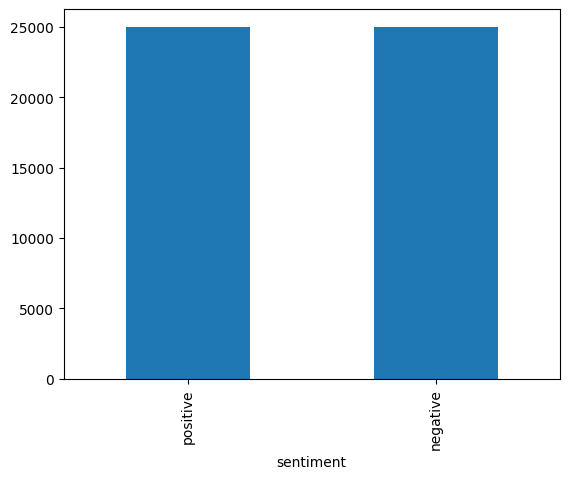

In [28]:
df['sentiment'].value_counts().plot(kind='bar')

In [29]:
print('레이블 개수')
print(df.groupby('sentiment').size().reset_index(name='count'))

레이블 개수
  sentiment  count
0  negative  25000
1  positive  25000


In [30]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])
df.head()
## 긍정: 1 부정: 0

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [31]:
X_data = df['review']
y_data = df['sentiment']
print('리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

리뷰의 개수: 50000
레이블의 개수: 50000


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train)

## train : test = 5:5
## train : valid = 2:8

print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


In [33]:
## 토큰화 진행 후 출력
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    tokenized_sent = word_tokenize(sent)
    tokenized_sent = [word.lower() for word in tokenized_sent]
    tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [01:03<00:00, 390.72it/s]


In [34]:
# 상위 샘플 2개 출력
for sent in tokenized_X_train[:2]:
  print(sent)

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

In [35]:
## counter 모듈을 사용해서 훈련 데이터에 존재하는 총 단어수를 확인
word_list = []
for sent in tokenized_X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 100586


In [36]:
print('훈련 데이터에서의 단어 same의 등장 횟수 :', word_counts['same'])
print('훈련 데이터에서의 단어 opportunity의 등장 횟수 :', word_counts['opportunity'])
## 빈도수 확인

훈련 데이터에서의 단어 same의 등장 횟수 : 3130
훈련 데이터에서의 단어 opportunity의 등장 횟수 : 314


In [37]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])
## 이번에는 등장 빈도수 별로 단어를 정렬한 뒤 상위 10개를 추출

등장 빈도수 상위 10개 단어
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']


In [39]:
threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 100586
등장 빈도가 2번 이하인 희귀 단어의 수: 61877
단어 집합에서 희귀 단어의 비율: 61.51651323245779
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3294254426463437


In [40]:
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))

단어 집합의 크기 : 38709


In [41]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 38711


3. 정수 인코딩

In [42]:
#최종 단어 집합(Vocabulary)인 word_to_index를 이용하여 정수 인코딩
#texts_to_sequences(): 주어진 데이터에서 각 단어를 word_to_index에 맵핑된 정수로 변환
#word_to_index에 존재하지 않는 단어가 등장한 경우에는 정수 1 부여
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)

In [43]:
# 상위 샘플 2개 출력
for sent in encoded_X_train[:2]:
  print(sent)

[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 1, 32, 6, 2669, 9, 2, 416, 1, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10, 11, 2,

In [44]:
#정수 인코딩 된 결과를 역으로 복원
#각 단어에 정수가 맵핑된 word_to_index를 반대로 만든 index_to_word를 구현해보고 첫번째 샘플에 대해 복원
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!',

4.패딩

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.1958


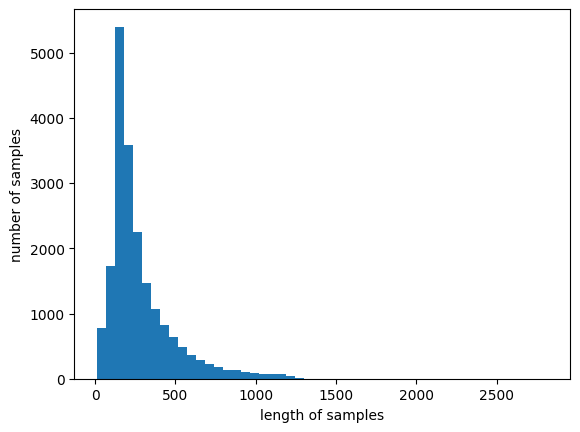

In [45]:
# 패딩을 위해 훈련 데이터의 최대 길이, 평균 길이, 그리고 데이터의 길이 분포를 확인
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [46]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [47]:
max_len = 500
below_threshold_len(max_len, encoded_X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.795


In [48]:
#pad_sequences(): 패딩 해주는 함수, 최대길이를 정하면 해당 길이보다 긴 데이터는 뒷 부분을 잘라서 해당 길이로 맞추고, 해당 길이보다 짧은 데이터는 뒤에 0을 채워서 해당 길이의 데이터로 변환
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


5. 모델

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [51]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습:", device)

cpu와 cuda 중 다음 기기로 학습: cpu


In [52]:
# label data를 파이토치의 텐서 타입으로 변환
#상위 5개의 레이블 출력
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])

tensor([1, 1, 0, 0, 0])


### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment7

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60